# Pandas (продолжение)

In [56]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [70]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})

In [71]:


from collections import Counter


for col in df.columns:
    mask = df.isnull()[col]
    print(col,(df[mask][col].index))
print(df.fillna(df.mean()))

print(df.fillna(df.median()))
#print(sorted(list(df.ord_no.dropna())))


for i in range(len(df.columns)):
   # print(max(set(i), key = i.count))
   df.iloc[:,i]=df.iloc[:,i].fillna(value=(Counter(df.iloc[:,i]).most_common(1)[0][0]))
df

ord_no Int64Index([1, 4, 6, 10], dtype='int64')
purch_amt Int64Index([1, 5, 8], dtype='int64')
sale_amt Int64Index([2, 5, 8], dtype='int64')
ord_date Int64Index([2], dtype='int64')
customer_id Int64Index([], dtype='int64')
salesman_id Int64Index([3, 7, 11], dtype='int64')
      ord_no    purch_amt   sale_amt    ord_date  customer_id  salesman_id
0   70001.00   150.500000  10.500000  2012-10-05         3002       5002.0
1   70006.25  1376.614444  20.650000  2012-09-10         3001       5003.0
2   70002.00    65.260000  39.324444         NaN         3001       5001.0
3   70004.00   110.500000  11.500000  2012-08-17         3003       5002.0
4   70006.25   948.500000  98.500000  2012-09-10         3002       5002.0
5   70005.00  1376.614444  39.324444  2012-07-27         3001       5001.0
6   70006.25  5760.000000  57.000000  2012-09-10         3001       5001.0
7   70010.00  1983.430000  19.430000  2012-10-10         3004       5002.0
8   70003.00  1376.614444  39.324444  2012-10-10    

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,150.50,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,150.50,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,150.50,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [65]:
df.interpolate()

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,150.50,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,150.50,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,150.50,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Пострйоет график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайныз строчек из DataFrame (без повторений)

       carat        cut color clarity  depth  table  price     x      y      z
11778   1.83       Fair     J      I1   70.0   58.0   5083  7.34   7.28   5.12
13002   2.14       Fair     J      I1   69.4   57.0   5405  7.74   7.70   5.36
13118   2.15       Fair     J      I1   65.5   57.0   5430  8.01   7.95   5.23
13562   1.96       Fair     F      I1   66.6   60.0   5554  7.59   7.56   5.04
13757   2.22       Fair     J      I1   66.7   56.0   5607  8.04   8.02   5.36
...      ...        ...   ...     ...    ...    ...    ...   ...    ...    ...
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90   7.97   5.04
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50   8.47   5.16
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51      Ideal     E     VS1   61.8   55.0   2075  5.15  31.80   5.12
49905   0.50  Very Good     G    VVS1   63.7   58.0   2180  5.01   5.04   5.06

[1457 rows x 10 columns]
carat       0.797940
depth

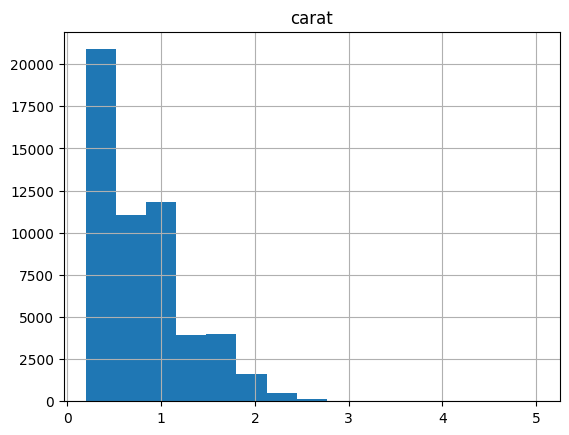

In [59]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
print(diamonds[(diamonds.x>5)&(diamonds.y>5)&(diamonds.z>5)])
dia=diamonds[['carat','depth','table','price','x','y','z']]
print(dia.mean())
print(diamonds.groupby('cut').agg({'price':'mean'}))
print(' ')

dia.hist('carat',bins=15)
print(diamonds.isna().sum())
print(' ')
#пропущенных значений нет
print(diamonds.memory_usage())
print(diamonds.memory_usage().sum())


In [ ]:
import random
list=[]
drand=pd.DataFrame(columns=diamonds.columns)
while len(list)<20:
    a=random.randint(0,diamonds.shape[0])
    if not a in list:
        list.append(a)
        
        drand=drand.append(diamonds.loc[a])

drand


,carat,cut,color,clarity,depth,table,price,x,y,z
6109,1.06,Ideal,E,SI2,60.7,57.0,3977,6.61,6.59,4.00
35056,0.47,Ideal,I,VS2,62.1,54.0,884,4.98,5.00,3.10
49307,0.30,Ideal,I,VVS1,61.8,54.0,540,4.32,4.35,2.68
5688,1.01,Very Good,H,SI2,60.6,61.0,3888,6.38,6.45,3.89
51197,0.61,Very Good,G,VVS2,62.3,59.0,2351,5.40,5.45,3.38
18618,1.07,Very Good,G,VVS2,59.4,57.0,7597,6.74,6.69,3.99
44386,0.41,Premium,D,VVS1,62.3,53.0,1582,4.78,4.75,2.97
19078,1.33,Ideal,H,VS2,62.6,57.0,7850,7.02,6.98,4.38
21015,1.60,Premium,F,SI2,61.1,58.0,9229,7.57,7.53,4.61
43731,0.51,Ideal,H,VS1,62.7,54.0,1438,5.12,5.15,3.22


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 6 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)##
-- В таблице нет столбца имен

10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


558 398 393
0.4175627240143369
0.40954773869346733
0.4071246819338422
0.32732732732732733
0.3630831643002028
0.3654618473895582
              age
sex              
female  27.915709
male    30.726645
14.516321150817316


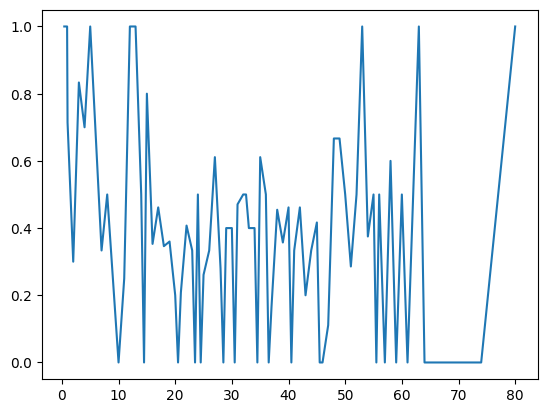

In [ ]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
si=titanic.shape[0]
dd=titanic.copy()
first=titanic[titanic.pclass==1].shape[0]
second=titanic[titanic.pclass==2].shape[0]
third=titanic[titanic.pclass==3].shape[0]
titanic=titanic.sort_values(by='age')
for i in range(si):
    if (titanic.head(i)[titanic.pclass==1].shape[0])==round(first/2):
        anser_class1=i 
        break
for i in range(si):
    if (titanic.head(i)[titanic.pclass==2].shape[0])==round(second/2):
        anser_class2=i 
        break
for i in range(si):
    if (titanic.head(i)[titanic.pclass==3].shape[0])==round(third/2):
        anser_class3=i 
        break   
print(anser_class1,anser_class2,anser_class3)
print(titanic.head(anser_class1).survived.mean())
print(titanic.head(anser_class2).survived.mean())
print(titanic.head(anser_class3).survived.mean())
print(titanic.tail(si-anser_class1).survived.mean())
print(titanic.tail(si-anser_class2).survived.mean())
print(titanic.tail(si-anser_class3).survived.mean())
print(titanic.groupby('sex').agg({'age':'mean'}))
print(np.std(titanic.age))
#
y=titanic.groupby('age').agg({'survived':'mean'})
plt.pyplot.plot(y)





28693.9493


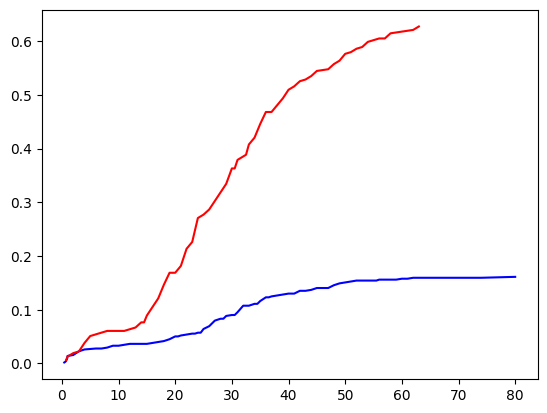

In [ ]:
male=titanic[titanic.sex=='male'].groupby('age').agg({'survived':'sum'}).cumsum()/titanic[titanic.sex=='male'].shape[0]
female=titanic[titanic.sex=='female'].groupby('age').agg({'survived':'sum'}).cumsum()/titanic[titanic.sex=='female'].shape[0]
plt.pyplot.plot(male,'b')
plt.pyplot.plot(female,'r')
print(titanic.fare.sum())
##- В таблице нет столбца имен

In [ ]:

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
